<a href="https://colab.research.google.com/github/female-coders-linz/workshops/blob/master/weather_forecast/Weather_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get closest Weather station
taken from https://projects.raspberrypi.org/en/projects/fetching-the-weather 

In [1]:
# Online Python - IDE, Editor, Compiler, Interpreter

from requests import get
import json

from pprint import pprint

# PART 1
# url = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'

# stations = get(url).json()['items']

# pprint(stations)

# PART 2

url = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/3710868'
weather = get(url).json()['items']

pprint(weather)

[{'air_pressure': 949.27,
  'air_quality': 51.51,
  'ambient_temp': 27.57,
  'created_by': 'Fatec Bauru',
  'created_on': '2017-10-02T09:55:01Z',
  'ground_temp': 22.44,
  'humidity': 44.85,
  'id': 6073791,
  'rainfall': 0,
  'reading_timestamp': '2017-10-02T09:55:01Z',
  'updated_by': 'Fatec Bauru',
  'updated_on': '2017-10-02T13:00:12.935Z',
  'weather_stn_id': 3710868,
  'wind_direction': 292.5,
  'wind_gust_speed': 0,
  'wind_speed': 0}]


## Calculate distance to current position 
to get closest weather station

In [2]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    #convert degrees to radians
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    distance = 2 * asin(sqrt(a)) * 6371 #6371 is the radius of the Earth
    return distance
    

# print(haversine(lon1=14.292024, lat1=48.294849, lon2=14.286382, lat2=48.306079)) 

In [4]:
# get my weather

from requests import get
import json
from pprint import pprint

stations = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getallstations'
weather = 'https://apex.oracle.com/pls/apex/raspberrypi/weatherstation/getlatestmeasurements/'

my_lat = 48.294849
my_lon = 14.292024

all_stations = get(stations).json()['items']

def find_closest():
    smallest = 20036
    
    for station in all_stations:
        station_lat = station['weather_stn_lat']
        station_lon = station['weather_stn_long']
        
        distance = haversine(lat1=my_lat, lon1=my_lon, lat2=station_lat, lon2=station_lon)
        
        if distance < smallest:
            smallest = distance
            closest_station = station['weather_stn_id']
    
    # pprint(closest_station)
    return closest_station
    
target_station = find_closest()

weather = weather + str(target_station)

my_weather = get(weather).json()['items']

pprint(my_weather)

567604
[{'air_pressure': 972.97,
  'air_quality': 43.08,
  'ambient_temp': 7.63,
  'created_by': 'ASG Wetterstation',
  'created_on': '2018-12-02T19:55:02Z',
  'ground_temp': 2,
  'humidity': 56.75,
  'id': 14382703,
  'rainfall': 0,
  'reading_timestamp': '2018-12-02T19:55:02Z',
  'updated_by': 'ASG Wetterstation',
  'updated_on': '2018-12-02T19:00:19.446Z',
  'weather_stn_id': 567604,
  'wind_direction': 0,
  'wind_gust_speed': 0,
  'wind_speed': 0}]


# Get current weather from API

https://rapidapi.com/community/api/open-weather-map/endpoints


In [ ]:
# Volkspark
my_lat = 48.294849
my_lon = 14.292024

headers = {
    'x-rapidapi-host': "community-open-weather-map.p.rapidapi.com",
    # This is my api KEY!
    'x-rapidapi-key': "fa5ca5310cmshd7d76dc9697db36p180788jsnc359745f7e3c"
    }

In [13]:
import requests

url = "https://community-open-weather-map.p.rapidapi.com/weather"


querystring = {"lat": my_lat,"lon": my_lon, "units":"metric", "lang":"de"}  #, "q":"Linz"

response = requests.request("GET", url, headers=headers, params=querystring).json()


print(response)

print(response['weather'][0]['description'])

{'coord': {'lon': 14.29, 'lat': 48.29}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'Überwiegend bewölkt', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.46, 'feels_like': 3.7, 'temp_min': 7.22, 'temp_max': 8, 'pressure': 1018, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 260}, 'clouds': {'all': 75}, 'dt': 1602527932, 'sys': {'type': 1, 'id': 6874, 'country': 'AT', 'sunrise': 1602479893, 'sunset': 1602519597}, 'timezone': 7200, 'id': 3321859, 'name': 'Froschberg', 'cod': 200}
Überwiegend bewölkt


## Get Weather forecast

In [28]:
url = "https://community-open-weather-map.p.rapidapi.com/forecast/daily"

querystring = {"lat":my_lat,"lon":my_lon,"cnt":"16","units":"metric"}

response = requests.request("GET", url, headers=headers, params=querystring).json()

pprint(response)


weather_list = response['list']

{'city': {'coord': {'lat': 48.29, 'lon': 14.29},
          'country': 'AT',
          'id': 3321859,
          'name': 'Froschberg',
          'population': 0,
          'timezone': 7200},
 'cnt': 16,
 'cod': '200',
 'list': [{'clouds': 87,
           'deg': 281,
           'dt': 1602496800,
           'feels_like': {'day': 4.29,
                          'eve': 6.63,
                          'morn': 2.01,
                          'night': 3.13},
           'humidity': 78,
           'pop': 0.99,
           'pressure': 1019,
           'rain': 4.16,
           'speed': 4.2,
           'sunrise': 1602479893,
           'sunset': 1602519597,
           'temp': {'day': 8.4,
                    'eve': 10.07,
                    'max': 11.09,
                    'min': 5.61,
                    'morn': 5.72,
                    'night': 6.18},
           'weather': [{'description': 'moderate rain',
                        'icon': '10d',
                        'id': 501,
                 

In [40]:
from datetime import datetime

temperatures = []
dts = []


for weather in weather_list:
  day_temp = weather['temp']['day']
  dt = datetime.utcfromtimestamp(weather['dt'])
  temperatures.append(day_temp)
  dts.append(dt)


In [41]:
import pandas as pd

temperature_series = pd.Series(data=temperatures, index=dts)

datetime.datetime(2020, 10, 26, 10, 0)

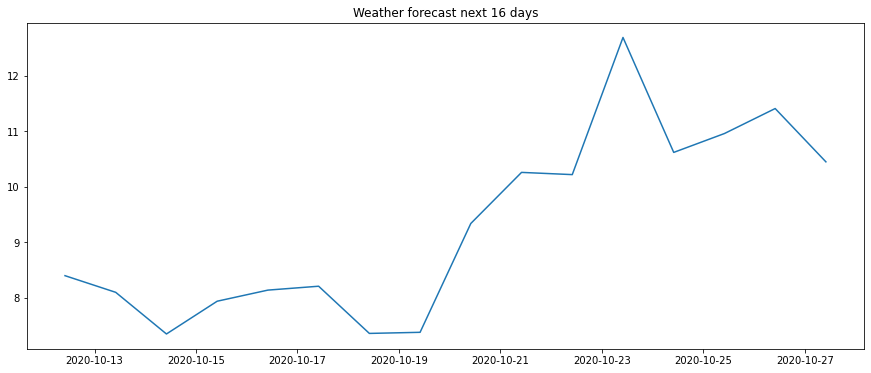

In [42]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(15, 6))
plt.plot(temperature_series)
plt.title('Weather forecast next 16 days')
plt.show()


## Get historical weather data

In [50]:
# from datetime import timedelta

# url = "https://community-open-weather-map.p.rapidapi.com/onecall/timemachine"

# five_days_ago = (datetime.now() - timedelta(days=5)).timestamp()

# querystring = {"lat":my_lat,"lon":my_lon,"dt": int(five_days_ago)}

In [54]:
# response = requests.request("GET", url, headers=headers, params=querystring)

# pprint(response.json())

{'current': {'clouds': 75,
             'dew_point': 280.44,
             'dt': 1602096978,
             'feels_like': 280.39,
             'humidity': 87,
             'pressure': 1011,
             'sunrise': 1602047456,
             'sunset': 1602088197,
             'temp': 282.49,
             'uvi': 2.83,
             'visibility': 10000,
             'weather': [{'description': 'broken clouds',
                          'icon': '04n',
                          'id': 803,
                          'main': 'Clouds'}],
             'wind_deg': 230,
             'wind_speed': 2.1},
 'hourly': [{'clouds': 75,
             'dew_point': 280.09,
             'dt': 1602028800,
             'feels_like': 279.62,
             'humidity': 81,
             'pressure': 1002,
             'rain': {'1h': 1.39},
             'temp': 283.2,
             'visibility': 10000,
             'weather': [{'description': 'moderate rain',
                          'icon': '10n',
                         